<a href="https://colab.research.google.com/github/khipucode/phd_data_and_codes/blob/main/3_3_3_simulacao_espectros_varios_moduladores_cascateados_e_regiao_plana_Fig_3_27_3_28.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**<center> Multiple Electro-Optical Modulators  Cascade**


# Sección nueva

<h4> Região de equalização 2D MZM :

https://colab.research.google.com/drive/13OndpzEN_pt-PSTrsxggMcy_JYZBdGxT



A desfasagem gerada pelo sinal modulante e pela tensão de polarização, no PM e em cada braço do MZM  é dado por:

\begin{align}
\Delta\phi = A \sin(\omega_g t + \varphi)+\theta
\end{align}

Rescrevendo a expressão (ne) para o PM e para os braços do MZM, tem-se:

\begin{align}
\Delta\phi_0(t) &= A_0 \sin(\omega_g t + \varphi_0) + \theta_0;  \\[1em]
\Delta\phi_1(t) &= A_1 \sin(\omega_g t + \varphi_1) + \theta_1;  \\[1em]
\Delta\phi_2(t) &= A_2 \sin(\omega_g t + \varphi_0)+ \theta_2.
\end{align}

Onde
\begin{align}
A_0 = \dfrac{\pi V_0}{V_{\pi PM}} ; \ \ \
A_1 = \dfrac{\pi V_1}{V_{\pi MZ}} ; \ \ \
A_2 = \dfrac{\pi V_2}{V_{\pi MZ}} \ \ \ e \ \ \
\theta_1 = \dfrac{\pi U_{DC1}}{V_{\pi MZ}}; \ \ \
\theta_2 = \dfrac{\pi U_{DC2}}{V_{\pi MZ}}
\end{align}


Com esses sinais de RF aplicados nas portas dos moduladores obtem-se o campo elétrico na saída, assim.

Campo elétrico na saída do PM:

\begin{align}
E_{PM} = E_{IN} e^{\Delta\phi_0} = E_{IN} e^{ A_0 \sin(\omega_g t + \varphi_0)}
\end{align}

Campo elétrico na saída do MZM:

\begin{align}
E_{MZM} = E_C e^{j\omega_c t}  e^{\Delta\phi_0}\dfrac{1}{2} (e^{\Delta\phi_1} + e^{\Delta\phi_2} )
\end{align}

<center> <h4> Identeidade de Jacobi-Anger </center> </h4>

\begin{align}
e^{jz \sin \theta} = \sum^{+\infty}_{n=-\infty} J_n(z) e^{i n \theta}
\end{align}

Empregando a identidade de Jacovi-Anger, o campo elétrico na saída do MZM pode se escrever como:

\begin{align}
E_{PM-MZM} = \dfrac{ E_C e^{j\omega_c t}}{2} \sum^{+\infty}_{n=-\infty} J_n(A_0) e^{j (n \omega_g t)} \sum^{+\infty}_{m=-\infty} \left[ J_m(A_1) e^{j (m \omega_g t + m\varphi_1 +\theta_1)} + J_m(A_2) e^{j (m \omega_g t + m\varphi_2+\theta_2)} \right]
\end{align}

Colocando en evidencia alguns termos, tem-se:
\begin{align}
E_{PM-MZM} = \dfrac{ E_C e^{j\omega_c t}}{2} \sum^{+\infty}_{n=-\infty} J_n(A_0) e^{j n\omega_g t} \sum^{+\infty}_{m=-\infty} \left[ J_m(A_1) e^{j\theta_1}e^{j m\varphi_1} + J_m(A_2) e^{j\theta_2} e^{j m\varphi_2}\right] e^{jm\omega_g t}
\end{align}

Para fins práticos, neste caso a obtenção de um algoritmo que permita encontrar a transformada de fourier desse campo elétrico, faz-se a substituição:
\begin{align}
   J_{n}^{PM} & = J_n(A_0) e^{j n\omega_g t}  \\[1em]
   J_{m}^{MZ} & = \left[ J_m(A_1) e^{j\theta_1}e^{j m\varphi_1} + J_m(A_2) e^{j\theta_2} e^{j m\varphi_2}\right] e^{jm\omega_g t}
\end{align}

Con o intuito de encontrar um padrão para obter o resultado do campo $E_{PM-MZM}$ faz-se a expansão dos somatórios da equação (12), e mostra-se os termos para quando o $n,m \ \epsilon \left[ -3, +3 \right]$, então obtém-se:

\begin{align}
\sum_{n=-\infty}^{+\infty} J_{n}^{PM} \sum_{n=-\infty}^{+\infty} J_{n}^{MZ} = (... J_{-3}^{PM}+J_{-2}^{PM}+J_{-1}^{PM}+J_{0}^{PM}+J_{1}^{PM}+J_{2}^{PM}+J_{3}^{PM}...) (... J_{-3}^{MZ}+J_{-2}^{MZ}+J_{-1}^{MZ}+J_{0}^{MZ}+J_{1}^{MZ}+J_{2}^{MZ}+J_{3}^{MZ}...)
\end{align}

<center><img src="https://edgetel.pe/wp-content/uploads/2022/05/algoritmo_pente.png" width="1000"></center>


In [134]:
import numpy as np
import math as mt

# convert dBm to V
PdBm1  =  19
V1     =  10**(PdBm1/20)/(2*np.sqrt(5))
print("The power PdBm1: ",PdBm1,"dBm is equal to V1:",V1," Volts" )

# Convert v to dBm
V_1    =  1.98
PdBm_1 = 20*mt.log(2*np.sqrt(5)*V_1,10)
print("The voltage V_1: ",V_1,"V is equal to PdBm_1:",PdBm_1," dBm" )


The power PdBm1:  19 dBm is equal to V1: 1.9928976826775142  Volts
The voltage V_1:  1.98 V is equal to PdBm_1: 18.943603761870435  dBm


In [135]:
# Converter dBm para mW
p1_dbm_a  =  8
p2_mw_a   =  1

p1_mw_a = 10**(p1_dbm_a/10)
p2_dbm_a = 10*mt.log10(p2_mw_a)

print(">>>",p1_dbm_a,' dBm é igual a ', p1_mw_a,' mW')
print(">>>",p2_mw_a,' mW é igual a ', p2_dbm_a,' dBm')

>>> 8  dBm é igual a  6.309573444801933  mW
>>> 1  mW é igual a  0.0  dBm


In [136]:
import math
import numpy as np     # library for vector operation
from mpmath import *   # library for bessel function
import matplotlib.pyplot as plt
from google.colab import files
import csv

# Parâmetros dos moduladores
Vpi_pm1  = 3
Vpi_mz1  = 4  #2.4

ts5 = 2*math.sqrt(5)  # 4.47213

# Potências de entrada em dBm nas portas dos moduladores
Ppm1  = 18.2;  ang1pm = 0;  Upm1   =  0;     Tpm1  =  (pi*Upm1/Vpi_pm1);    Apm1  = (pi/Vpi_pm1)*10**(Ppm1/20)/ts5
V1pm  =  10**(Ppm1/20)/(2*np.sqrt(5));

# ------------------------------------No condition
#Pmz1a = 33;  ang1a  = 0;  Umz1a  =  0;   Th1a  =  (pi*Umz1a/Vpi_mz1);   Amz1a = (pi/Vpi_mz1)*10**(Pmz1a/20)/ts5
#Pmz1b = 32;  ang1b  = 0;  Umz1b  =  0;     Th1b  =  (pi*Umz1b/Vpi_mz1);   Amz1b = (pi/Vpi_mz1)*10**(Pmz1b/20)/ts5;
# ------------------------------------MZM flat condition
Pmz1a    = 30.48;  V1a  =  10**(Pmz1a/20)/(2*np.sqrt(5));  ang1a  = 0;  Umz1a  = Vpi_mz1/2 ;    Th1a  =  (pi*Umz1a/Vpi_mz1);   Amz1a = (pi/Vpi_mz1)*10**(Pmz1a/20)/ts5 # Umz1a  = Vpi_mz1/2
Nao_used = 10;     V1b  =  V1a + Vpi_mz1/2;                ang1b  = 0;  Umz1b  =  0;            Th1b  =  (pi*Umz1b/Vpi_mz1);   Amz1b = Amz1a + pi/2;

#----------------Potência do laser em mW---------------------
#if P_cw is inside the MZ vector, this will multiply the number of times there are MZs, so P_cw

#---------------------------- VALORES DE TENSÕES ------------------
Apm1 = 1.9   #.9   # 1.9 valor experimento
Amz1a = 9.78   #9.78 valor experimento
Amz1b = 11.35   #11.35 valor experimento

# comparacao Vpi Aa = 8,64 e Ab =  11.78

P_cw    = 3.55
num_mzm = 3
P_cw    = P_cw**(1/3)   # porque la potencia do laser se multiplica cada vez q usa-se um modulador
P_cw  =  1


# ==============================================================================
#-----------------TESTING VALUES--------------------
print("=======PARA O CASO DO PM ================")
print("tensão V1pm", V1pm)
print("tensão A1pm", Apm1)
print("=======PARA O CASO DO MZM ================")
print("V1a and V1b", V1a,"and", V1b)
V1a_test = Amz1a*Vpi_mz1/pi
V1b_test = Amz1b*Vpi_mz1/pi
print("Amz1a and Amz1b em V", Amz1a,"and", Amz1b)
print("V1a_test and V1b_test ao invés do dBm", V1a_test,"and", V1b_test)
print("Amz1a and Amz1b", Amz1a,"and", Amz1b)
print("=========RANGE PLOTING 2D================")
print("0 A 14 V")
Amz1a_1 = 0
Amz1b_1 = 14
V1a_2dplot = Amz1a_1*Vpi_mz1/pi
V1b_2dplot = Amz1b_1*Vpi_mz1/pi
print('V1_start',V1a_2dplot, 'V1_end',V1b_2dplot)

#-----------------TESTING VALUES--------------------
# ==============================================================================
up_n  =  65  #org  45
up_m  =  65  #67   45
noise = 10**-7    #lim  -8
noise_dBm = 10*log10(noise)

#===============================================================================

#--------------------------- Preenchimento do vector PM
top_n = int((up_n-1)/2)
ind_n = range(-top_n,top_n+1)

Vector_pm = []
for n in ind_n:
  J_n_Apm = besselj(n,Apm1)
  Vector_pm.append(J_n_Apm)

#---------------------------- Preenchimento do vector MZ
top_m = int((up_m-1)/2)
ind_m = range(-top_m,top_m+1)

Vector_mz = []
for m in ind_m:
  J_m_Amz1a = besselj(m,Amz1a)
  J_m_Amz1b = besselj(m,Amz1b)
  temp = P_cw*0.5*J_m_Amz1a*exp(j*(m*ang1a + Th1a)) + P_cw*0.5*J_m_Amz1b*exp(j*(m*ang1b + Th1b))
  Vector_mz.append(temp)
# MZM transfer function : https://webdemo.inue.uni-stuttgart.de/webdemos/02_lectures/uebertragungstechnik_2/mach_zehnder_modulator/index.php?id=1
#-------------------------------------------------------------------------------
# Função principal que faz o produto cruzado de 2 campos eletricos, usando como
# dados de entrada os tamanhos dos vectores e vectores de campos eletricos
# que estão interagindo

def crossprod_efield(up_1, Vector_1, up_2, Vector_2):
 up_vre = up_1 + up_2 - 1    # limite do vetor resultante
 #ax_crossprod_vector = []   # dominio do vetor resultante
 #top_k = int((up_vre-1)/2)
 #ax_crossprod_vector = range(-top_k,top_k+1)
 Matrix_cross_efield = np.zeros((up_1, up_vre), dtype=complex) # Tamanho da matrix
 t = 0
 k = 0
 # -------------------- begin for
 for j in range(up_1):
  temp1 = Vector_1[j]
  for i in range(up_2):
    temp2 = Vector_2[i]
    temp3 = temp1*temp2
    k     = i + t
    Matrix_cross_efield[j][k] = temp3
 #print('\n')
  t = j+1
 # -------------------- end for

 #Vector_EFre  Electric Field Resultant
 Vector_EFre= np.sum(Matrix_cross_efield, axis=0) #soma das colunas de campos E
 temp2 = [abs(kt) for kt in Vector_EFre]
 #print(Vector_EFre)
 Vector_Ire = np.square(temp2)  # Intensity_resultant
 #Vector_Ire = np.square(abs(Vector_EFre))  # Intensity_resultant # it doesn't work

 return up_vre, Matrix_cross_efield, Vector_EFre, Vector_Ire

#--------------------------end crossprod_efield
#-------------------------------------------------------------------------------
#------------------------------------------------------------------------------

def add_noise(up_vec, Vector_Iout_all, noise):
 ax_vector_comb  = []   # dominio do vetor resultante
 top_k = int((up_vec-1)/2)
 ax_vector_comb = range(-top_k,top_k+1)
 Comb_plot     = []    # vector usado para considerar o ruido
 Comb_plot_dBm = []    # vector usado para considerar o ruido en dBm
 for k1 in range(up_vec):
    temp  = Vector_Iout_all[k1]
    if temp < noise:
      Comb_plot.append(0)
      Comb_plot_dBm.append(10*log10(noise))
    else:
      Comb_plot.append(Vector_Iout_all[k1])
      Comb_plot_dBm.append(10*log10(temp))
 return ax_vector_comb,Comb_plot,Comb_plot_dBm

#------------function calculate Intensity and add noise----------------
#  Usa um vetor de campo elétrico e calcula E.^2 e adiciona ruido
def find_Iout_add_noise(up_vec, Vector_efield_all, noise):
 temp2 = [abs(k2) for k2 in Vector_efield_all]
 Vector_Iout_all = np.square(temp2)
 ax_vector_comb  = []   # dominio do vetor resultante
 top_k = int((up_vec-1)/2)
 ax_vector_comb = range(-top_k,top_k+1)
 Comb_plot     = []    # vector usado para considerar o ruido
 Comb_plot_dBm = []    # vector usado para considerar o ruido en dBm
 for k1 in range(up_vec):
    temp  = Vector_Iout_all[k1]
    if temp < noise:
      Comb_plot.append(0)
      Comb_plot_dBm.append(10*log10(noise))
    else:
      Comb_plot.append(Vector_Iout_all[k1])
      Comb_plot_dBm.append(10*log10(temp))

 return ax_vector_comb,Comb_plot,Comb_plot_dBm

# -------------------------------------------------------------------------
# Esta função Reduz o tamanho do vector Comb (que já tem ruido) para um valor
# desejado, neste caso não importa se o vector está em mW ou dBm
# up_vec = tamanho atual, vec_comb = vector_actual, up_new = tamanho requerido

def reduct_vector(up_act, vec_comb, up_new):
 # up_act = tamanho atual do vector vec_comb
 a = int((up_act-up_new)/2)
 b = int(a + up_new)
 c = int((up_new-1)/2)
 ax_rang = range(-c,c+1)
 ax_new_list = list(ax_rang)
 new_vcomb = []
 for k in range(a,b):
  new_vcomb.append(vec_comb[k])

 return ax_new_list, new_vcomb
#--------------------------------------end function
# SAÍDA: lista novo dominio do comb , comb com dominio maior
#----------------------------------------------------------------------------
# Esta função aumenta o  o tamanho do vector Comb (que já tem ruido) para um
# valor desejado  unid = 1 -> em mW  ou otro em dBm, noise = usado no sistema

def increase_vector(up_act, vec_comb, up_new, unid, noise):
 # (ax_new, new_vcomb) = increase_vector(up_act, vec_comb, up_new, unid, noise)
 rg = int((up_new - 1)/2)
 a1 = int((up_new - up_act)/2)
 a2 = int(a1 + up_act)
 ax_rang = range(-rg, rg + 1)
 ax_new = list(ax_rang)
 new_vcomb = []
 t1 = 0
 for k in range(up_new):
  if k < a1  or k > a2-1:
    if unid == 1:
     new_vcomb.append(0)
    else:
     new_vcomb.append(10*math.log10(noise))
  else:
   new_vcomb.append(vec_comb[t1])
   t1 = t1 + 1
 return ax_new, new_vcomb
# SAÍDA: lista novo dominio do comb , comb com dominio maior
# ---------------------------------------------------------------------
#----------------- FUNCAO PARA PLOTAR SLs --------------------------
def ploting_sl(axrange, comb, comb_dBm, sistem):
 fig, axes = plt.subplots(1, 2, figsize=(20, 6), tight_layout=True)   #org  20,5
 plt.rcParams['font.size'] = '18'
 axes[0].stem(axrange,comb,
              use_line_collection = True, linefmt='blue', markerfmt='bo')
 axes[0].set_title('Intensidade de saída normalizada do'+ sistem, pad=15)
 axes[0].set_xlabel("$m$")
 axes[0].set_ylabel("$I_{MZM}/I_{IN}$")  #axes[0].set_ylabel("$I_{PM}/I_{IN}$")
 axes[0].grid(True,which="both", linestyle='--')

 #----**************-----------------
 #axes[0].set_xlim(-27, 27)
 #axes[0].set_ylim(-0.001, 0.04)
#----**************-----------------


 axes[1].stem(axrange,comb_dBm,
              bottom = noise_dBm,
              use_line_collection = True, linefmt='blue', markerfmt='bo')
 axes[1].set_title('Intensidade de saída normalizada do'+sistem+'em dB', pad=15)
 axes[1].set_xlabel("$k$")
 axes[1].set_ylabel("$10 log(I_{EOMS}/I_{IN})$ (dB)")  #axes[1].set_ylabel("$10 log_{10}(I_{PM}/I_{IN})$ (dB)")
 axes[1].grid(True,which="both", linestyle='--')

 #/****************************
 #axes[1].set_xlim(-23, 23)
 #axes[1].set_ylim(-82, 0)
#/****************

# axes[1].set(xlim=(-25, 25), ylim=(-81, 0))
 #specify axis tick step sizes
#plt.xticks(np.arange(min(ax_new1n), max(ax_new1n)+1, 5))
#plt.yticks(np.arange(-80, -10, 10))   # faixa do grid e tamanho do paso
#ax.set(xlim=(-50, 50), ylim=(-81, -10))  # ploting area xlabel and y label

 #specify axis tick step sizes

print("Amz1a and Amz1b", Amz1a,"and", Amz1b)

=======PARA O CASO DO PM ================
tensão V1pm 1.8175442883291673
tensão A1pm 1.9
=======PARA O CASO DO MZM ================
V1a and V1b 7.472828272416545 and 9.472828272416546
Amz1a and Amz1b em V 9.78 and 11.35
V1a_test and V1b_test ao invés do dBm 12.4522827475099 and 14.4512688327441
Amz1a and Amz1b 9.78 and 11.35
=========RANGE PLOTING 2D================
0 A 14 V
V1_start 0.0 V1_end 17.8253536262923
Amz1a and Amz1b 9.78 and 11.35


<ipython-input-136-5ca61daa3a02>:213: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  axes[0].stem(axrange,comb,
<ipython-input-136-5ca61daa3a02>:226: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  axes[1].stem(axrange,comb_dBm,


Amz1a and Amz1b 9.78 and 11.35


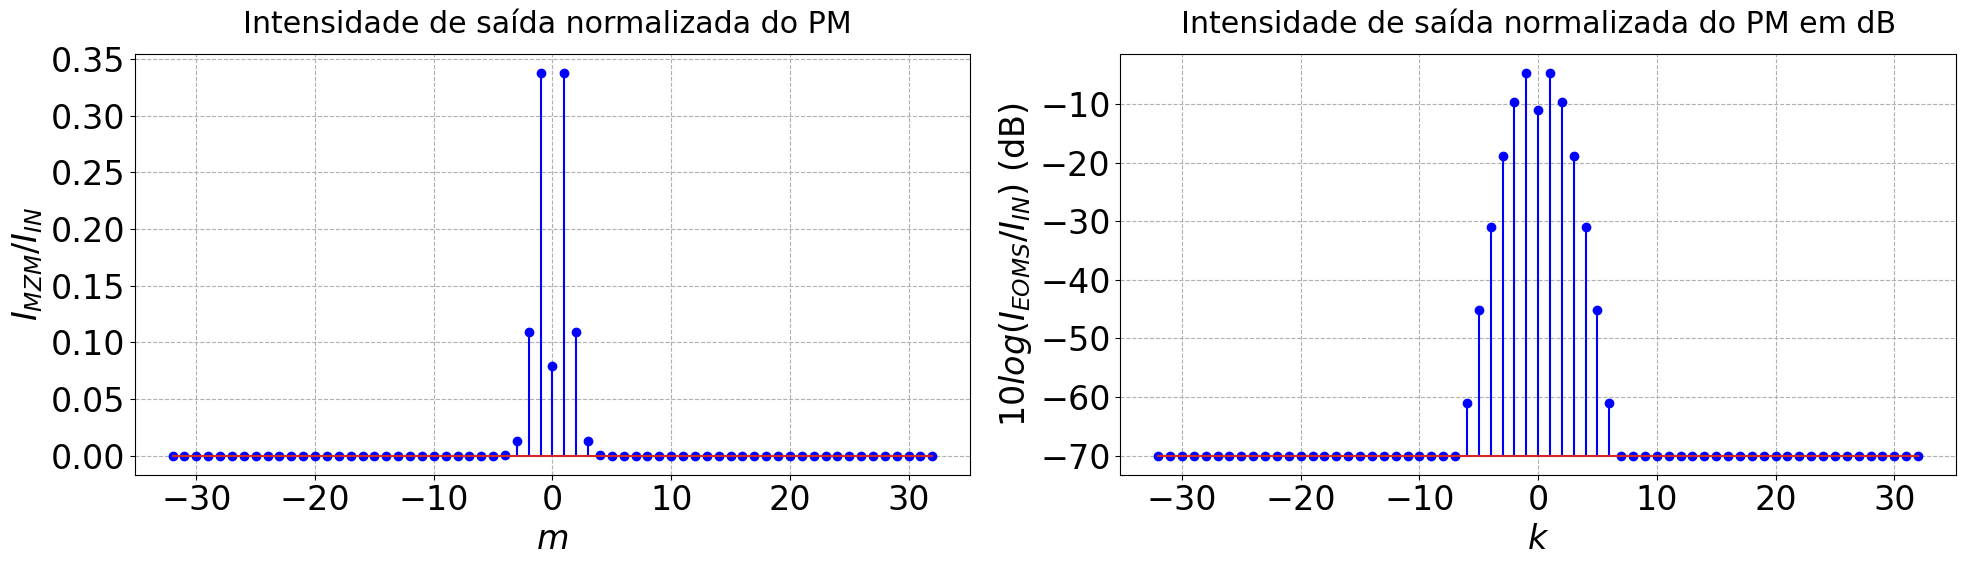

In [137]:
#-------------- PLOTAR AS SLs GERADAS PELO PM -------------------------
# usa-se a linha onde é gerada os valores do campo eletrico e o tamanho do vector pm
(ax_pm,comb_pm,comb_pm_dBm) = find_Iout_add_noise(up_n, Vector_pm, noise)
sistem1 = ' PM '
ploting_sl(ax_pm,comb_pm,comb_pm_dBm,sistem1)
print("Amz1a and Amz1b", Amz1a,"and", Amz1b)

<ipython-input-136-5ca61daa3a02>:213: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  axes[0].stem(axrange,comb,
<ipython-input-136-5ca61daa3a02>:226: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  axes[1].stem(axrange,comb_dBm,


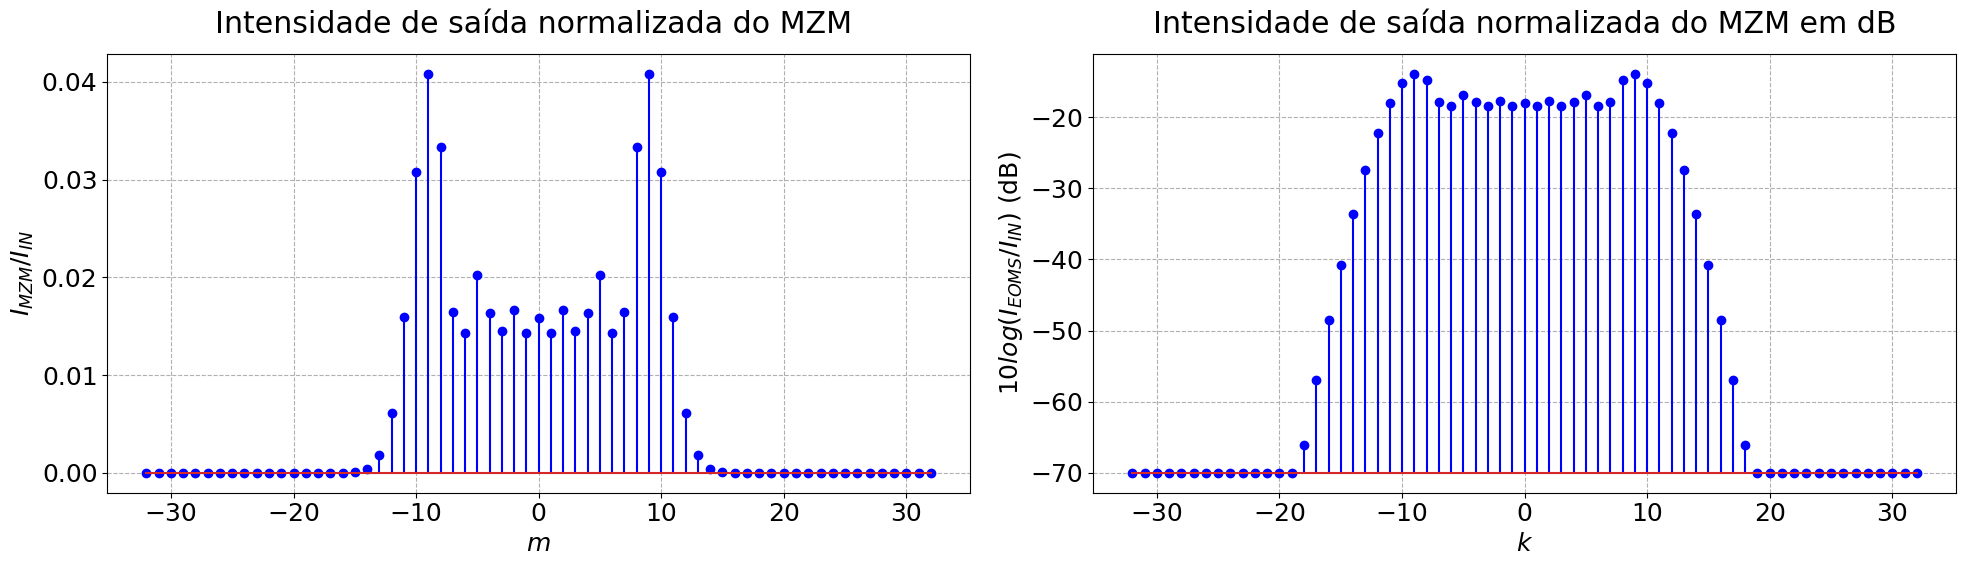

In [138]:
#-------------- PLOTAR AS SLs GERADAS PELO MZM -------------------------
# usa-se a linha onde é gerada os valores do campo eletrico e o tamanho do vector mz
(ax_mz,comb_mz,comb_mz_dBm) = find_Iout_add_noise(up_m, Vector_mz, noise)
sistem2 = ' MZM '
ploting_sl(ax_mz,comb_mz,comb_mz_dBm,sistem2)


<ipython-input-136-5ca61daa3a02>:213: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  axes[0].stem(axrange,comb,
<ipython-input-136-5ca61daa3a02>:226: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  axes[1].stem(axrange,comb_dBm,


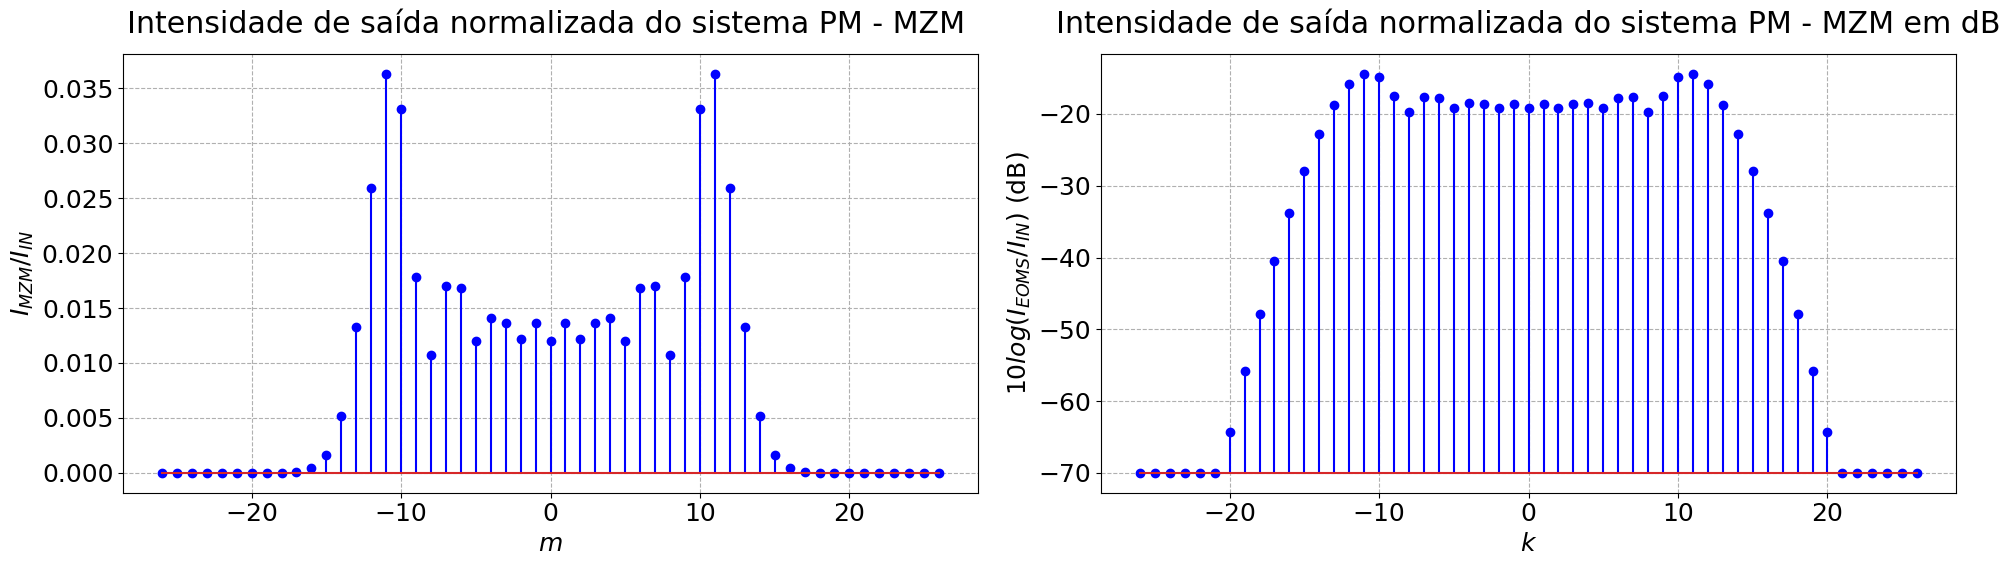

In [139]:
#TESTE PARA UM MODULADOR COM CONFIGURAÇÃO NA FR E OS OUTROS FORA DA FR
'''
A1a = 9.78   #9.78 valor experimento
A1b = 11.35   #11.35 valor experimento

Vector_mz1 = []
for m in ind_m:
  J_m_Amz1a = besselj(m,A1a)
  J_m_Amz1b = besselj(m,A1b)
  temp = P_cw*0.5*J_m_Amz1a*exp(j*(m*ang1a + Th1a)) + P_cw*0.5*J_m_Amz1b*exp(j*(m*ang1b + Th1b))
  Vector_mz1.append(temp)
'''


up_2     = up_n
Vector_2 = Vector_pm
up_1     = up_m
Vector_1 = Vector_mz
# Aplica-se a função de produto de campos para obter o vetor resultante do sistema PM-MZM
(up_3, Matrix_cross3, Vector_EFre3, Vector_Ire3) = crossprod_efield(up_1, Vector_1, up_2, Vector_2)

# Aplica-se a função add_noise para colocar um ruido de referência
(ax_vector3,comb3,comb_dBm3)=add_noise(up_3, Vector_Ire3, noise)

#print(comb3)
#print(type(comb3))
file = open("comb_3data.csv","a", newline="")
writer = csv.writer(file)
writer.writerow(comb_dBm3)
file.close()

# Aplica-se a função reduzir vector para ajustar ao dominio de outros pentes obtidos
up_act = up_3
up_new = 53
(ax_new3, new_vcomb3) = reduct_vector(up_act, comb3, up_new)
(ax_new3, new_vcomb_dB3) = reduct_vector(up_act, comb_dBm3, up_new)


sistem3 = ' sistema PM - MZM '
ploting_sl(ax_new3,new_vcomb3,new_vcomb_dB3,sistem3)
plt.show()


<ipython-input-136-5ca61daa3a02>:213: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  axes[0].stem(axrange,comb,
<ipython-input-136-5ca61daa3a02>:226: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  axes[1].stem(axrange,comb_dBm,


193
121


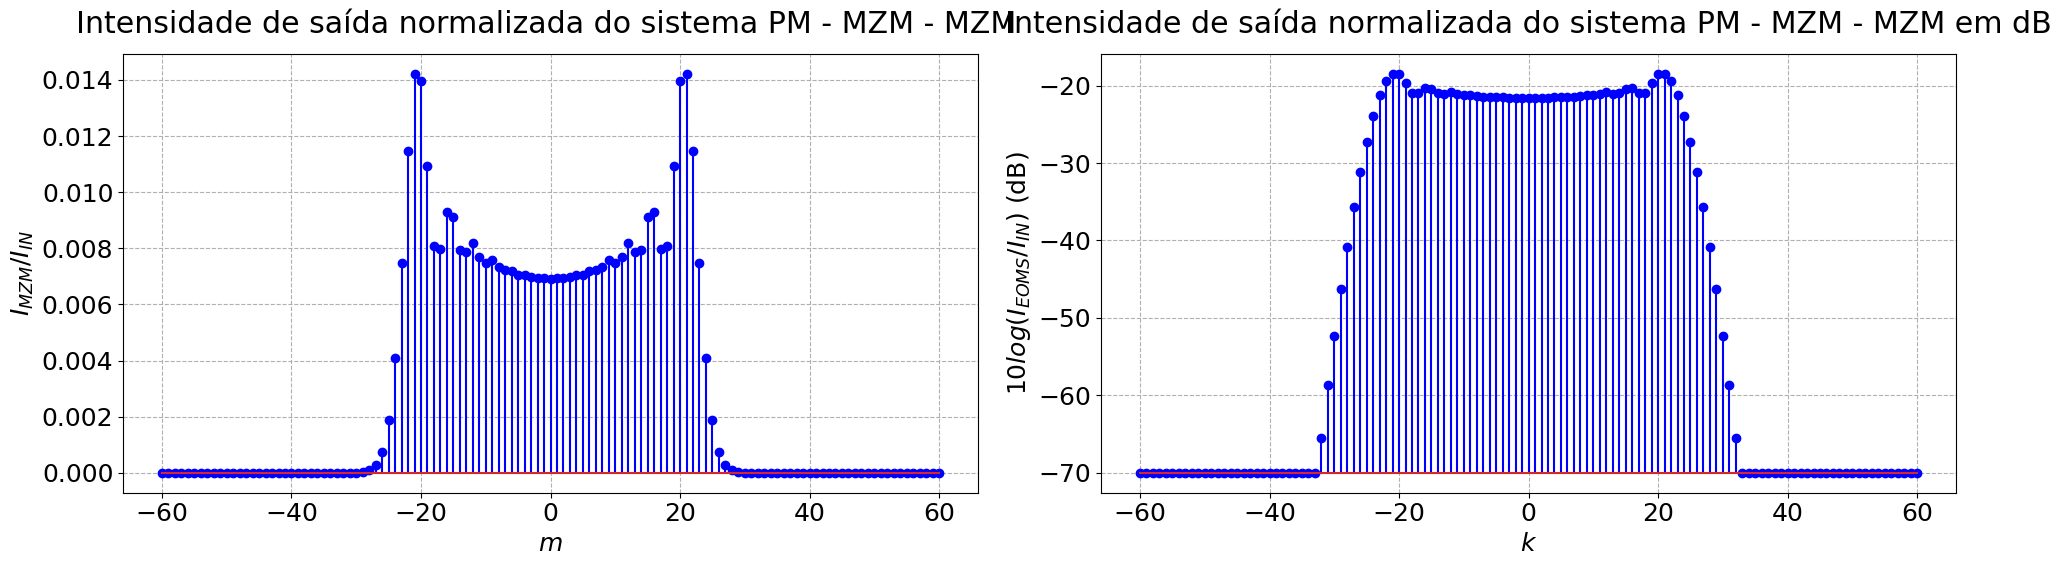

In [140]:
# ESTAGIO 4
# Resultado para PM-MZM e um outro MZM
(up_4, Matrix_cross4, Vector_EFre4, Vector_Ire4) = crossprod_efield(up_m, Vector_mz, up_3, Vector_EFre3)

# Aplica-se a função add_noise para colocar um ruido de referência
(ax_vector4,comb4,comb_dBm4)=add_noise(up_4, Vector_Ire4, noise)

# Aplica-se a função reduzir vector para ajustar ao dominio de outros pentes obtidos, após colocar ruidos
up_act = up_4
up_new = 121
(ax_new4, new_vcomb4) = reduct_vector(up_act, comb4, up_new)
(ax_new4, new_vcomb_dB4) = reduct_vector(up_act, comb_dBm4, up_new)

sistem4 = ' sistema PM - MZM - MZM '
ploting_sl(ax_new4,new_vcomb4,new_vcomb_dB4,sistem4)

print(up_4)
print(len(ax_new4))


<ipython-input-136-5ca61daa3a02>:213: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  axes[0].stem(axrange,comb,
<ipython-input-136-5ca61daa3a02>:226: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  axes[1].stem(axrange,comb_dBm,


257
121


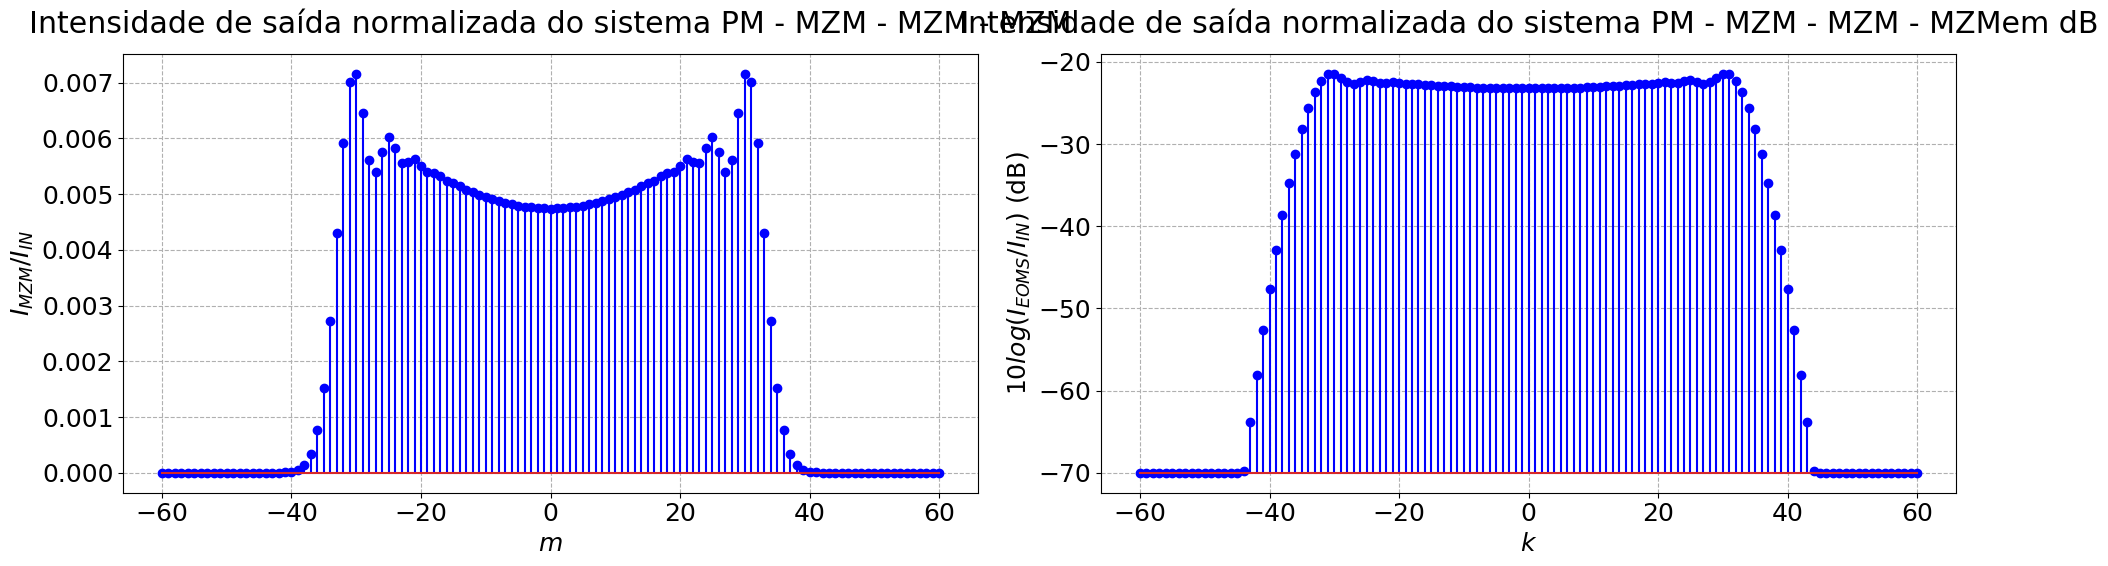

In [141]:

# PM - MZM - MZM - MZM   up_5
# Resultado para PM-MZM-MZM e um outro MZM
(up_5, Matrix_cross5, Vector_EFre5, Vector_Ire5) = crossprod_efield(up_m, Vector_mz, up_4, Vector_EFre4)

# Aplica-se a função add_noise para colocar um ruido de referência
(ax_vector5,comb5,comb_dBm5)=add_noise(up_5, Vector_Ire5, noise)

# Aplica-se a função reduzir vector para ajustar ao dominio de outros pentes obtidos, após colocar ruidos
up_act = up_5
up_new1 = 121
(ax_new5, new_vcomb5) = reduct_vector(up_act, comb5, up_new1)
(ax_new5, new_vcomb_dB5) = reduct_vector(up_act, comb_dBm5, up_new1)

sistem5 = ' sistema PM - MZM - MZM - MZM'
ploting_sl(ax_new5,new_vcomb5,new_vcomb_dB5,sistem5)

print(up_5)
print(len(ax_new5))

<ipython-input-142-e6dbb637719d>:20: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  ax.stem(ax_new1n, new_vcomb_dB5,


121


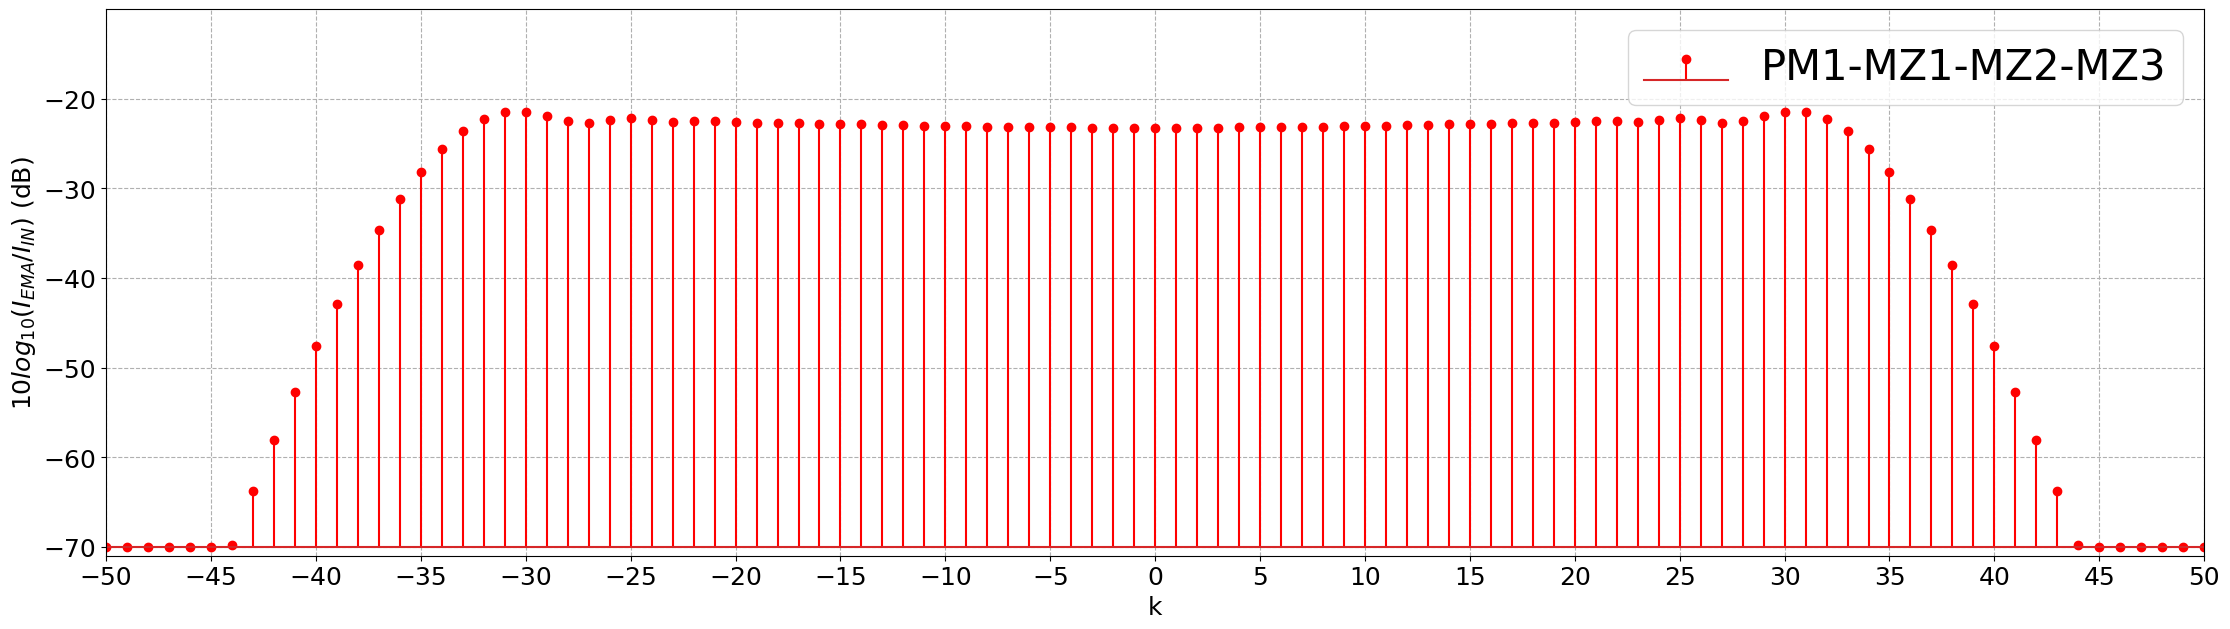

In [142]:
# Ajuste do dominio do PM :
up_new  = 121
(ax_new1n, new_vcomb1n) = increase_vector(up_n, comb_pm_dBm, up_new, 2, noise)

# Ajuste do dominio do MZ a up_new :
(ax_new2n, new_vcomb2n) = increase_vector(up_m, comb_mz_dBm, up_new, 2, noise)

# Ajuste do dominio do PM - MZ a up_new: o vetor original tem tam maior do 111
(ax_new3n, new_vcomb3n) = increase_vector(53, new_vcomb_dB3, up_new, 2, noise)

# Ajuste do dominio do PM - MZ - MZM a up_new (atual de PM-MZM-MZM-MZM): o vetor original tem tam maior do 111
# increase_vector(up_act, vec_comb, up_new, unid, noise):
(ax_new4n, new_vcomb4n) = increase_vector(111, new_vcomb_dB4, up_new, 2, noise)


fig, ax = plt.subplots(1, 1, figsize=(23, 7), tight_layout=True)
plt.rcParams['font.size'] = '30'


ax.stem(ax_new1n, new_vcomb_dB5,
              bottom = noise_dBm,
              use_line_collection = True, linefmt='red', markerfmt='ro', label="PM1-MZ1-MZ2-MZ3")

'''
#plt.show()
ax.stem(ax_new1n, new_vcomb_dB4,
              bottom = noise_dBm,
              use_line_collection = True, linefmt='blue', markerfmt='bo', label="PM1-MZ1-MZ2")
'''
'''
ax.stem(ax_new1n, new_vcomb3n,
              bottom = noise_dBm,
              use_line_collection = True, linefmt='fuchsia', markerfmt='fuchsia', label="PM-MZ")
'''



#specify axis tick step sizes
plt.xticks(np.arange(min(ax_new1n), max(ax_new1n)+1, 5))
plt.yticks(np.arange(-70, -10, 10))   # faixa do grid e tamanho do paso
ax.set(xlim=(-50, 50), ylim=(-71, -10))  # ploting area xlabel and y label


#ax.legend()  posição
# best / upper right /  upper left   /  lower left  /  lower right  /  right
# center left  /  center right  / lower center  /  upper center  /  center
ax.legend(loc="upper right")
ax.grid(True,which="both", linestyle='--')
ax.set_xlabel('k')
ax.set_ylabel("$10 log_{10}(I_{EMA}/I_{IN})$ (dB)")

print(len(ax_new1n))

# https://appgametutoriales.com/tipos-de-marcadores-matplotlib-python/


<ipython-input-143-e703cc15da2d>:19: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  ax.stem(ax_new1n, new_vcomb_dB5,
<ipython-input-143-e703cc15da2d>:23: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  ax.stem(ax_new1n, new_vcomb_dB4,
<ipython-input-143-e703cc15da2d>:26: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  ax.stem(ax_new1n, new_vcomb3n,


121


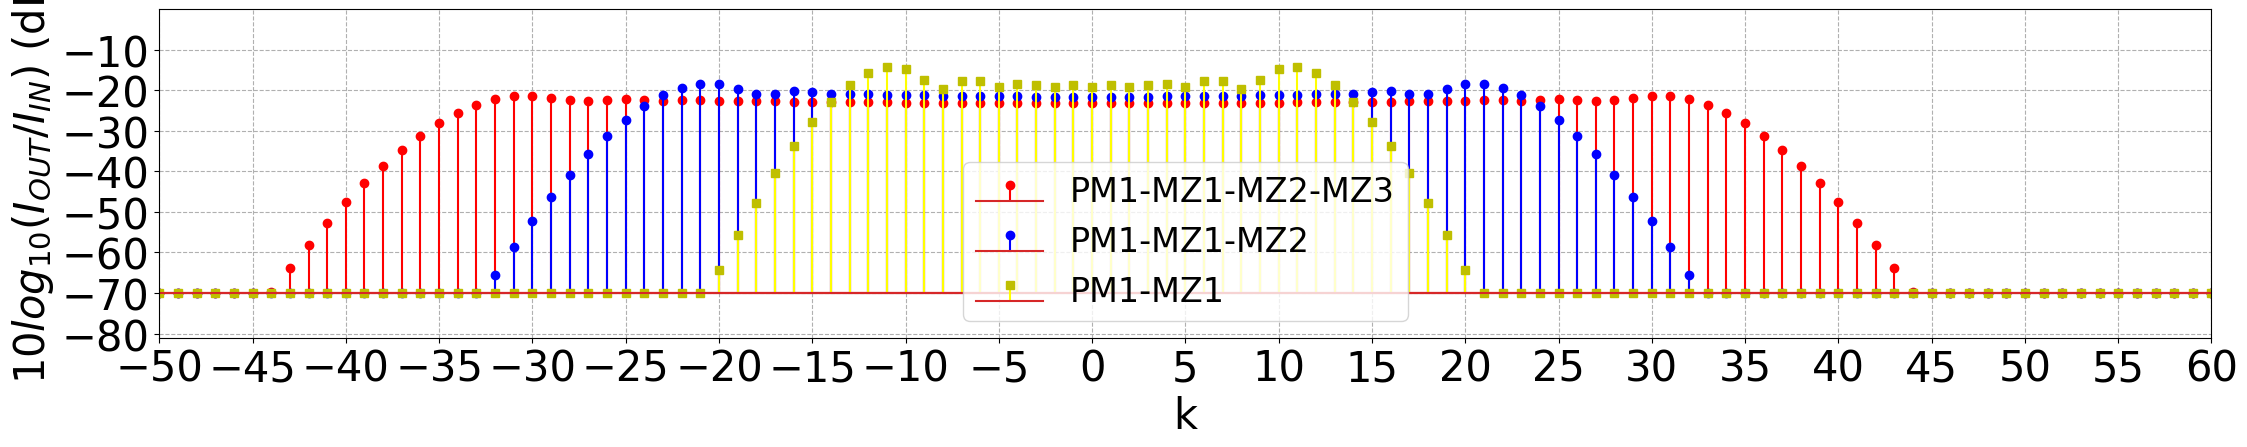

In [143]:
# Ajuste do dominio do PM :
up_new  = 121
(ax_new1n, new_vcomb1n) = increase_vector(up_n, comb_pm_dBm, up_new, 2, noise)

# Ajuste do dominio do MZ a up_new :
(ax_new2n, new_vcomb2n) = increase_vector(up_m, comb_mz_dBm, up_new, 2, noise)

# Ajuste do dominio do PM - MZ a up_new: o vetor original tem tam maior do 111
(ax_new3n, new_vcomb3n) = increase_vector(53, new_vcomb_dB3, up_new, 2, noise)

# Ajuste do dominio do PM - MZ - MZM a up_new (atual de PM-MZM-MZM-MZM): o vetor original tem tam maior do 111
# increase_vector(up_act, vec_comb, up_new, unid, noise):
(ax_new4n, new_vcomb4n) = increase_vector(111, new_vcomb_dB4, up_new, 2, noise)



fig, ax = plt.subplots(1, 1, figsize=(23, 5), tight_layout=True)
plt.rcParams['font.size'] = '24'
ax.stem(ax_new1n, new_vcomb_dB5,
              bottom = noise_dBm,
              use_line_collection = True, linefmt='red', markerfmt='ro', label="PM1-MZ1-MZ2-MZ3")

ax.stem(ax_new1n, new_vcomb_dB4,
              bottom = noise_dBm,
              use_line_collection = True, linefmt='blue', markerfmt='bo', label="PM1-MZ1-MZ2")
ax.stem(ax_new1n, new_vcomb3n,
              bottom = noise_dBm,
              use_line_collection = True, linefmt='yellow', markerfmt='ys', label="PM1-MZ1")

'''
ax.stem(ax_new1n, new_vcomb2n,
              bottom = noise_dBm,
              use_line_collection = True, linefmt='aqua', markerfmt='o', label="MZ")
ax.stem(ax_new1n, new_vcomb1n,
              bottom = noise_dBm,
              use_line_collection = True, linefmt='green', markerfmt='go', label="PM")
'''
#ax.legend((40, -40), ('oscillatory', 'damped'), loc='upper right', shadow=True)
#specify axis tick step sizes
plt.xticks(np.arange(min(ax_new1n), max(ax_new1n)+1, 5))
plt.yticks(np.arange(-80, 0, 10))     # faixa do grid e tamanho do paso

ax.set(xlim=(-50, 60), ylim=(-81, 0))  # ploting area

#ax.set(xlim=(-55, 55), ylim=(-81, 0))  # ploting area
ax.legend()
ax.grid(True,which="both", linestyle='--')
ax.set_xlabel('k')
ax.set_ylabel("$10 log_{10}(I_{OUT}/I_{IN})$ (dB)")

print(len(ax_new1n))

Numero de SLs considerados =  65
max_dyn_flat - min_dyn_flat = 1.78927246997447
media das SLs= -22.7178944995147


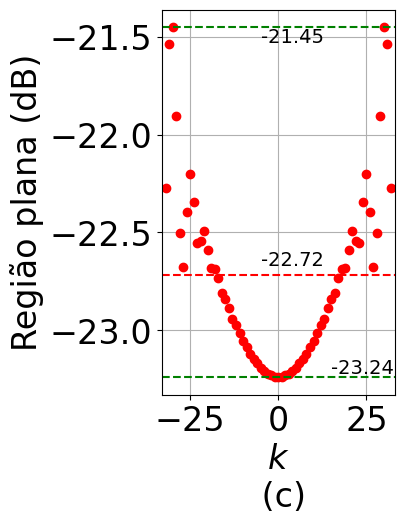

In [144]:

def flatting_analysis(ax_comb1,comb1,dB_under_max, SLs_center ):
  # ax_comb : valores do axis x do pente (dominio)
  # comb1   : pente a ser analisado
  # dB_under_max : dB por debaixo da SL max que podera ser incluida no analise
  # SLs_center   : numero de SLs centrais que serão usado para calcular a media
  x2d = np.array(ax_comb1).reshape(-1,1)  # dominio convertido a array 2D

  # Selecao da região do pente a ser analisada será dB_under dB por debaixo do maximo
  flat_range_comb = []
  max_sl = max(comb1)                     # Valor do máximo SL do pente

  low_stop = max_sl - dB_under_max        # limite inferior para pegar as SLs

  for i in range(len(comb1)):
    if comb1[i] > low_stop:
      flat_range_comb.append(comb1[i])    # preenche de datos da regiao plana

  num1 = len(flat_range_comb)   # numero de elementos da regiao a ser usada
  #  -------- fixa a faixa de SLs centrais a serem analisados----------
  sl_cen = (num1 + 1)/2
  init_ind  = int(sl_cen - (SLs_center - 1)/2) -1   # inicio de contagem do pente
  end_ind  = int(sl_cen + (SLs_center - 1)/2)   # fin contagem pente setado inicio

  dyn_flat_rg = []
  for j in range(init_ind, end_ind):
    dyn_flat_rg.append(flat_range_comb[j])

  #dyn_flat_rg
  med_val = sum(dyn_flat_rg)/len(dyn_flat_rg)

  maxSL = max(dyn_flat_rg)
  minSL = min(dyn_flat_rg)
  up_dif      = maxSL - med_val
  low_dif     = med_val - minSL
  low_up      = maxSL - minSL  # deferença entre o max e o min

  len_pente  =  len(dyn_flat_rg)          # comprimento dos datos analisados
  lim_ax     =  int((len_pente-1)/2)      # limite do axis x


  return dyn_flat_rg, med_val, low_up, lim_ax, maxSL, minSL

# ______________________________________________________________________________
# data, calculation and ploting PM1-MZ1-MZ1-MZ1
ax_comb1      = ax_new1n    # para o sistema PM-MZ-MZ-MZ
comb1         = new_vcomb_dB5 #new_vcomb3n
dB_under_max  = 4
SLs_center    = 65
tam_letra  =  14

(pente,med, low_up, lim, maxSL, minSL) = flatting_analysis(ax_comb1,comb1,dB_under_max, SLs_center )

x = range(-lim,lim+1)

print("Numero de SLs considerados = ", len(pente))
print("max_dyn_flat - min_dyn_flat =", low_up)
print("media das SLs=",med)

plt.figure(figsize=(3, 5))
plt.plot(x,pente,'ro')
plt.xlim([-lim-1, lim+1])
#plt.ylim([-5.5, -3.5])
plt.xlabel("$k$ \n (c)")
plt.ylabel("Região plana (dB)")
plt.axhline(y=med, color='r', linestyle='dashed')
plt.text(-5, med+0.05, round(med,2), fontsize = 14)
#plt.axhline(y=-4.79, color='m', linestyle='dashed')
#plt.text(-9, -4.75 , str(round(-4.79111,2))+' dB', fontsize = 14)

plt.axhline(y=maxSL, color='g', linestyle='dashed')
plt.text(-5, maxSL-0.08, round(maxSL,2), fontsize = 14)

plt.axhline(y=minSL, color='g', linestyle='dashed')
plt.text(15, minSL+0.02, round(minSL,2), fontsize = 14)
#plt.title('(c)')
plt.grid()

# maxima quantidade de SLs a serem analizadas  = 65

# resul_usando  near nigthbors, dense region n SL = 57
# SLs mas densas inferior de onde sai a meia = - 4.79 dB
# max - min = flat criterium = 1.04 dB



Numero de SLs considerados =  47
max_dyn_flat - min_dyn_flat = 3.13412534778556
media das SLs= -20.8185160970535


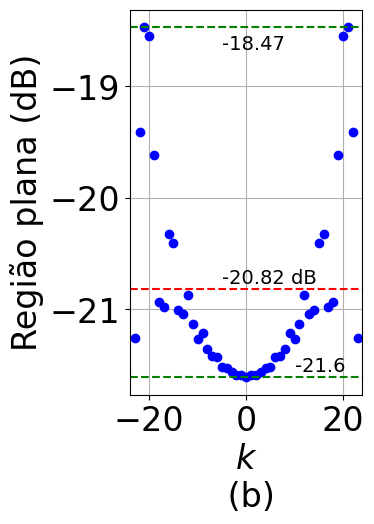

In [145]:
# data, calculation and ploting PM1-MZ1-MZ2
ax_comb1      = ax_new1n    # para o sistema PM-MZ-MZ-MZ
comb1         = new_vcomb4n #new_vcomb3n
dB_under_max  = 6
SLs_center    = 47

(pente,med, low_up, lim, maxSL, minSL) = flatting_analysis(ax_comb1,comb1,dB_under_max, SLs_center )

x = range(-lim,lim+1)

print("Numero de SLs considerados = ", len(pente))
print("max_dyn_flat - min_dyn_flat =", low_up)
print("media das SLs=",med)

plt.figure(figsize=(3, 5))
plt.plot(x,pente,'bo')
plt.xlim([-lim-1, lim+1])
#plt.ylim([-10, -6])
plt.xlabel("$k$ \n (b)")
plt.ylabel("Região plana (dB)")
plt.axhline(y=med, color='r', linestyle='dashed')
plt.text(-5, med+0.05, str(round(med,2))+' dB', fontsize = 14)
#plt.axhline(y=-9.15, color='m', linestyle='dashed')
#plt.text(-8, -9.05 , str(round(-9.15111,2))+' dB', fontsize = 14)

plt.axhline(y=maxSL, color='g', linestyle='dashed')
plt.text(-5, maxSL-0.2, round(maxSL,2), fontsize = 14)

plt.axhline(y=minSL, color='g', linestyle='dashed')
plt.text(10, minSL+0.05, round(minSL,2), fontsize = 14)
#plt.title('(b)')
plt.grid()

# maximo  47 Sls

#for dense region = 37
# Media tirar de 37  (10 estao dispersao) = -9.15 dB
# flat criterium  = 1.29 dB


SISTEMA PM1-MZ1
Numero de SLs considerados =  27
max_dyn_flat - min_dyn_flat = 5.31599976004809
media das SLs= -17.7938316980895


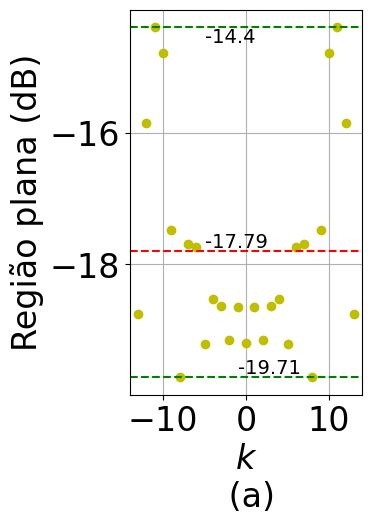

In [146]:
# data, calculation and ploting PM1-MZ1
ax_comb1      = ax_new1n    # para o sistema PM-MZ-MZ-MZ
comb1         = new_vcomb3n #new_vcomb3n
dB_under_max  = 6
SLs_center    = 27  #27

(pente,med, low_up, lim, maxSL, minSL) = flatting_analysis(ax_comb1,comb1,dB_under_max, SLs_center )

x = range(-lim,lim+1)

print("SISTEMA PM1-MZ1")
print("Numero de SLs considerados = ", len(pente))
print("max_dyn_flat - min_dyn_flat =", low_up)
print("media das SLs=",med)

plt.figure(figsize=(3, 5))
plt.plot(x,pente,'yo')
plt.xlim([-lim-1, lim+1])
#plt.ylim([-14, -8])
plt.xlabel("$k$ \n (a)")
plt.ylabel("Região plana (dB)")
plt.axhline(y=med, color='r', linestyle='dashed')
plt.text(-5, med+0.05, round(med,2), fontsize = 14)
#plt.axhline(y=-12.55, color='m', linestyle='dashed')
#plt.text(-3, -12.3 , str(round(-12.5511,2))+' dB', fontsize = 14)


plt.axhline(y=maxSL, color='g', linestyle='dashed')
plt.text(-5, maxSL-0.24, round(maxSL,2), fontsize = 14)

plt.axhline(y=minSL, color='g', linestyle='dashed')
plt.text(-1, minSL+0.05, round(minSL,2), fontsize = 14)
#plt.title('(a)')
plt.grid()

# caso PM1- MZ1  maixmo 27 SLs incluindo os níveis altos

#   for dense 19
# superflat serão menos 8 ou seja 19
#  media dos 19 superflat = -12.55
# flat criterium for dense = 2.2 dB



sl_central 34.0
seleicao [mpf('-23.656450566245422'), mpf('-22.274337747882583'), mpf('-21.535708413555817'), mpf('-21.450482922317939'), mpf('-21.904072085178395'), mpf('-22.502805103472028'), mpf('-22.675945585111336'), mpf('-22.393813811291206'), mpf('-22.200361585602767'), mpf('-22.346502032225931'), mpf('-22.554566261521344'), mpf('-22.542042976399713'), mpf('-22.491888665993915'), mpf('-22.589766750644795'), mpf('-22.683744932815021'), mpf('-22.688427355565782'), mpf('-22.733347414938798'), mpf('-22.810497876699564'), mpf('-22.843277481137019'), mpf('-22.884393404821669'), mpf('-22.940958613223327'), mpf('-22.975740008552808'), mpf('-23.015532820371387'), mpf('-23.056406279797791'), mpf('-23.086573534429743'), mpf('-23.119657415675977'), mpf('-23.147065485499489'), mpf('-23.170613771491269'), mpf('-23.19234817993603'), mpf('-23.208655207184016'), mpf('-23.222512041909965'), mpf('-23.231947398241456'), mpf('-23.237700374594166'), mpf('-23.239755392292412'), mpf('-23.23770037459416

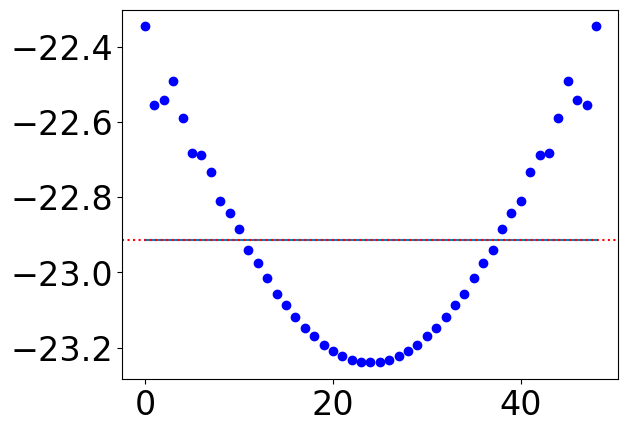

In [147]:
from sklearn.linear_model import LinearRegression #Regresión Lineal con scikit-learn
import numpy as np
import random


dB_under_max  = 3
SLs_center  = 49                   # SLs a ser usadas para a media
ax_comb1  = ax_new1n                     # dominio en lista
x2d = np.array(ax_comb1).reshape(-1,1)  # dominio convertido a array 2D
comb1 = new_vcomb_dB5 #new_vcomb3n


# Selecao da região do pente a ser analisada será 6 dB por debaixo do maximo
flat_range_comb = []
max_sl = max(comb1)             # Valor do máximo SL
# print("max_SL c1",max_sl)    # aqueles que estão alguns dB em baixo
low_stop = max_sl - dB_under_max        # limite inferior para pegar as SLs
#print(low_stop)
for i in range(len(comb1)):
  if comb1[i] > low_stop:
    flat_range_comb.append(comb1[i])    # preenche de datos da regiao plana

num1 = len(flat_range_comb)   # numero de elementos da regiao a ser usada

sl_cen = (num1 + 1)/2
print("sl_central", sl_cen)
init_ind  = int(sl_cen - (SLs_center - 1)/2) -1   # inicio de contagem do pente
end_ind  = int(sl_cen + (SLs_center - 1)/2)   # fin contagem pente setado inicio

#print("start contagem", c2[init_ind])
#print("end contagem", c2[end_ind])
# Posição do SL central
print("seleicao",flat_range_comb)
print(len(flat_range_comb))
#print("central",num1)
#print("ini_ind", init_ind)

dyn_flat_rg = []
for j in range(init_ind, end_ind):
  dyn_flat_rg.append(flat_range_comb[j])

med_val = sum(dyn_flat_rg)/len(dyn_flat_rg)
max_dyn_flat = max(dyn_flat_rg)
min_dyn_flat = min(dyn_flat_rg)

print("rangeeeeee+",max_dyn_flat-min_dyn_flat)


# ------------------- linear regression ------------------------
dy_model = LinearRegression()
ax_dyn = range(len(dyn_flat_rg))
ax_dyn2D = np.array(ax_dyn).reshape(-1,1)
dy_model.fit(ax_dyn2D, dyn_flat_rg)
dyn_predic = dy_model.predict(ax_dyn2D)

plt.plot(ax_dyn,dyn_predic)
#plt.show()
# --------------------------------------------------------------

print("med" , med_val)
print("longitud ventor flat",len(dyn_flat_rg))


plt.axhline(y=med_val, color='r', linestyle='dotted')
#plt.plot(5,med_val,'ro')
plt.plot(dyn_flat_rg,'bo')


#plt.figure(figsize=(25, 15))
#plt.plot(x,new_vcomb3n,'bo')
